<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/09_3_LSTM%2C_GRU_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련하기

In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split( train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [12]:
# pad_sequences() 메소드로 각샘플의 길이를 100에 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
# LSTM 셀을 사용한 순환층을 만들어 보면,
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))   # 500개의 토큰을 16 벡터 크기의 토큰 100개로 바꿈
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


SImpleRNN 클래스의 모델 파라미터 개수 = 뉴런 8개 X 임베딩 벡터 크기 16 + 은닉 상태에 곱해지는 가중치 8 X 8 + 절편8 개 = 200, 동일 조건에 LSTM 셀에는 작은셀이 4개 이므로 800

In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 67ms/step - loss: 0.6927 - accuracy: 0.5210 - val_loss: 0.6921 - val_accuracy: 0.5424
Epoch 2/100
313/313 [==============================] - 31s 100ms/step - loss: 0.6910 - accuracy: 0.5676 - val_loss: 0.6901 - val_accuracy: 0.5822
Epoch 3/100
313/313 [==============================] - 28s 89ms/step - loss: 0.6883 - accuracy: 0.6028 - val_loss: 0.6867 - val_accuracy: 0.6054
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6835 - accuracy: 0.6178 - val_loss: 0.6808 - val_accuracy: 0.6212
Epoch 5/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6754 - accuracy: 0.6326 - val_loss: 0.6707 - val_accuracy: 0.6346
Epoch 6/100
313/313 [==============================] - 17s 56ms/step - loss: 0.6610 - accuracy: 0.6532 - val_loss: 0.6516 - val_accuracy: 0.6570
Epoch 7/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6297 - accuracy: 0.6811 - val_loss: 0.5987 - val_a

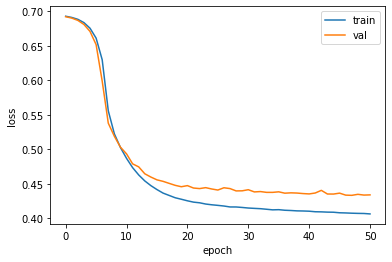

In [16]:
# 그림으로 그려 보면,
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환층에 드롭아웃 적용하기

In [17]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=13-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 76ms/step - loss: 3.9425 - accuracy: 0.5060 - val_loss: 2.7270 - val_accuracy: 0.4928
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 4.4283 - accuracy: 0.5084 - val_loss: 2.6201 - val_accuracy: 0.4978
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 3.6167 - accuracy: 0.4994 - val_loss: 2.7761 - val_accuracy: 0.5220
Epoch 4/100
313/313 [==============================] - 19s 61ms/step - loss: 4.4174 - accuracy: 0.5005 - val_loss: 2.1688 - val_accuracy: 0.5098
Epoch 5/100
313/313 [==============================] - 20s 65ms/step - loss: 4.0801 - accuracy: 0.5010 - val_loss: 2.5596 - val_accuracy: 0.5000
Epoch 6/100
313/313 [==============================] - 25s 80ms/step - loss: 3.7669 - accuracy: 0.5005 - val_loss: 3.0257 - val_accuracy: 0.5122
Epoch 7/100
313/313 [==============================] - 20s 64ms/step - loss: 3.4737 - accuracy: 0.5066 - val_loss: 2.5861 - val_ac

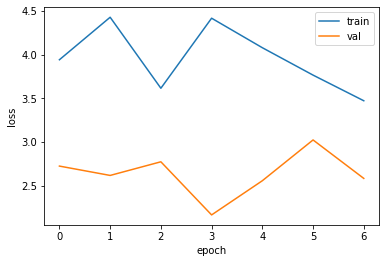

In [20]:
# 드롭아웃을 적용한 순환층을 그려 보면,
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층을 연결하기
      순환층을 쌓게 되면 모든 순환층에 수나 데이터가 필요, 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함, 마지막 층에서만 타임스텝의 은닉 상태를 출력해야 함.

In [21]:
# 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 모든 순환층에서 return_sequences 매개변수를 True로 지정
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=13-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
hisory = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 57s 167ms/step - loss: 3.6983 - accuracy: 0.5029 - val_loss: 2.1902 - val_accuracy: 0.4874
Epoch 2/100
313/313 [==============================] - 46s 147ms/step - loss: 2.3348 - accuracy: 0.5036 - val_loss: 3.3474 - val_accuracy: 0.4874
Epoch 3/100
313/313 [==============================] - 39s 126ms/step - loss: 2.2173 - accuracy: 0.5067 - val_loss: 0.9908 - val_accuracy: 0.4874
Epoch 4/100
313/313 [==============================] - 40s 128ms/step - loss: 2.2269 - accuracy: 0.5019 - val_loss: 3.0662 - val_accuracy: 0.5126
Epoch 5/100
313/313 [==============================] - 48s 153ms/step - loss: 2.2785 - accuracy: 0.4961 - val_loss: 2.6077 - val_accuracy: 0.4874
Epoch 6/100
313/313 [==============================] - 44s 141ms/step - loss: 2.2484 - accuracy: 0.4983 - val_loss: 1.1671 - val_accuracy: 0.5126


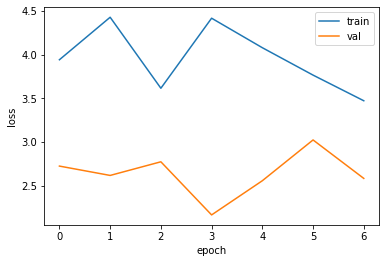

In [26]:
# 그림을 그려 보면,
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 구조

## GRU 신경망 훈련하기

In [28]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [29]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


SimpleRNN 모델의 200개에 GRU 셀의 작은 셀 3개가 곱해져 600, GPU의 효율적 활용을 위해 작은 셀마다 추가되는 절편과 뉴런의 개수로 3 X 8 = 24, 624개의 모델 파라미터가 생김, 이론과 구현의 차이가 있다!

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 70ms/step - loss: 0.6921 - accuracy: 0.5332 - val_loss: 0.6913 - val_accuracy: 0.5638
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6894 - accuracy: 0.5886 - val_loss: 0.6884 - val_accuracy: 0.5852
Epoch 3/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6851 - accuracy: 0.6115 - val_loss: 0.6833 - val_accuracy: 0.6058
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6778 - accuracy: 0.6298 - val_loss: 0.6743 - val_accuracy: 0.6228
Epoch 5/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6650 - accuracy: 0.6449 - val_loss: 0.6583 - val_accuracy: 0.6458
Epoch 6/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6414 - accuracy: 0.6679 - val_loss: 0.6276 - val_accuracy: 0.6802
Epoch 7/100
 45/313 [===>..........................] - ETA: 14s - loss: 0.6172 - accuracy: 0.6885

In [ ]:
# 모델의 손실을 그래프로 그려 보면,
plt.plot(history.history['loss'])
plt.plt(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀로 훈련

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

# 총 정리

## 키워드

### LSTM
      LSTM 셀은 타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층
      입력 게이트, 삭제 게이트, 출력 게이트 역할을 하는 작은 셀들이 포함되어 있음

### 셀 상태
      LSTM 셀은 은닉 상태 외에 셀 상태를 출력함
      셀 상태는 다음 층으로 전달되지 않으며 현재 셀에서 순환되며 은닉 상태에 영향을 미침

### GRU
      LSTM 셀의 간소화 버전이나 좋은 성능을 보임

## 핵심 패키지와 함수

###Tensorflow

#### LSTM
      LSTM 셀을 사용한 순환층 클래스
      첫 번째 매개변수에서 뉴런의 개수를 지정
      dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정
      return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정, 디폴트는 False

#### GRU
      GRU 셀을 사용한 순환층 클래스
      첫 번째 매개변수에 뉴런의 개수를 지정
      dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정
      return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정, 디폴트는 False
    

## 팁

1. LSTM, GRU를 두 개 쌓을 때에는 반드시 마지막 층을 제외한 모든 층에서 return_sequences 매개변수를 True로 지정해야함

2. 드롭아웃을 적용하고 층을 쌓는 것이 정확도 향상에 좋다!